In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/dataframesfull.csv')
neolib = pd.read_csv('../data/neoliberal.csv')
libertarian = pd.read_csv('../data/libertarian.csv')


In [3]:
neolib.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,media,media_embed,secure_media,secure_media_embed,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded
0,0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
neolib.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
neolib.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,media,media_embed,secure_media,secure_media_embed,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded
0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,t2_g0ghp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,t2_1aw062bq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,t2_645jw739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,t2_2z0li5f0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,t2_rsfab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded,link_flair_css_class,is_created_from_ads_ui,banned_by,author_is_blocked
0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,t2_g0ghp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,t2_1aw062bq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,t2_645jw739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,t2_2z0li5f0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,t2_rsfab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
libertarian.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
libertarian.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,author_flair_background_color,author_flair_template_id,author_flair_text_color,edited,removed_by_category,author_cakeday,media_metadata,is_created_from_ads_ui,banned_by,author_is_blocked
0,[],False,CombativeMinds1776,NaN,[],NaN,text,t2_7sfykn31,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,BlueChimp5,NaN,[],NaN,text,t2_7agq20eh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Snoo47858,NaN,[],NaN,text,t2_74msqcii,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,MorbidCocktail,NaN,[],NaN,text,t2_10zfgb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,pingpongplaya69420,NaN,"[{'e': 'text', 't': 'Minarchist'}]",Minarchist,richtext,t2_57112yea,False,False,...,#f3c817,25c6421c-1cf1-11e2-89d6-12313d051e91,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
libertarian.shape

(1000, 79)

In [11]:
neolib.shape

(988, 78)

In [12]:
df.shape

(1988, 82)

In [13]:
neolib.columns.values.tolist()

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'post_hint',
 'preview',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thum

In [14]:
neolib[['title', 'selftext', 'subreddit', 'created_utc', 'score', 'upvote_ratio', 'url',
      'link_flair_text']]

,title,selftext,subreddit,created_utc,score,upvote_ratio,url,link_flair_text
0,Biden Must Purge Military and Law Enforcement ...,NaN,neoliberal,1611108637,4,0.83,https://slate.com/news-and-politics/2021/01/bi...,Opinions (US)
1,"Under Biden, it’s time for Democrats to let go...",NaN,neoliberal,1611116767,1,1.00,https://www.independent.co.uk/voices/biden-med...,Opinions (US)
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,neoliberal,1611118940,1,1.00,https://www.reddit.com/r/neoliberal/comments/l...,Discussion
3,Joe Biden at noon today,NaN,neoliberal,1611130630,1,1.00,https://i.redd.it/65sy6vxu4gc61.jpg,Meme
4,Canada's ambassador to U.S. shares most Biden ...,NaN,neoliberal,1611134352,1,1.00,https://www.reuters.com/article/us-canada-usa/...,News (US)
...,...,...,...,...,...,...,...,...
983,What changes has Biden made to our immigration...,When I talk to my friends who are a lot farthe...,neoliberal,1621446378,1,1.00,https://www.reddit.com/r/neoliberal/comments/n...,Discussion
984,"""Steel trade groups, union call on Biden to le...",NaN,neoliberal,1621464903,1,1.00,https://thehill.com/policy/finance/554351-stee...,News (US)
985,Nord Stream 2: Biden waives US sanctions on Ru...,NaN,neoliberal,1621471453,1,1.00,https://www.bbc.com/news/world-us-canada-57180674,News (non-US)
986,Israeli Prime Minister Benjamin Netanyahu reje...,NaN,neoliberal,1621471503,1,1.00,https://www.chicagotribune.com/nation-world/ct...,News (US)


In [15]:
df_initial = df[['title', 'selftext', 'subreddit', 'url']]
df_initial

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,neoliberal,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,neoliberal,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,neoliberal,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,neoliberal,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,neoliberal,https://www.reuters.com/article/us-canada-usa/...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,Libertarian,https://www.cnn.com/2021/08/16/politics/covid-...
1984,Biden administration to require a COVID-19 boo...,NaN,Libertarian,https://www.bsocialplus.com/post/biden-adminis...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,Libertarian,https://www.reddit.com/r/Libertarian/comments/...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],Libertarian,https://www.reddit.com/r/Libertarian/comments/...


In [16]:
df_initial['subreddit'] = df_initial['subreddit'].replace({'neoliberal': 1, 'Libertarian': 0})

<ipython-input-16-aa299f87cefc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial['subreddit'] = df_initial['subreddit'].replace({'neoliberal': 1, 'Libertarian': 0})


In [17]:
df_initial

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,1,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,1,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,1,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1,https://www.reuters.com/article/us-canada-usa/...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,0,https://www.cnn.com/2021/08/16/politics/covid-...
1984,Biden administration to require a COVID-19 boo...,NaN,0,https://www.bsocialplus.com/post/biden-adminis...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0,https://www.reddit.com/r/Libertarian/comments/...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0,https://www.reddit.com/r/Libertarian/comments/...


In [18]:
df_initial['subreddit'].value_counts(normalize=True)

0    0.503018
1    0.496982
Name: subreddit, dtype: float64

In [19]:
neolib_initial = df_initial.loc[df_initial['subreddit'] == 1]
libertarian_initial = df_initial.loc[df_initial['subreddit'] == 0]

In [20]:
neolib_initial.head()

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,1,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,1,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,1,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1,https://www.reuters.com/article/us-canada-usa/...


In [21]:
libertarian_initial.head()

,title,selftext,subreddit,url
988,Biden selects transgender doctor Rachel Levine...,NaN,0,https://www.washingtonpost.com/health/2021/01/...
989,“Biden campaign calls China's treatment of Uig...,NaN,0,https://www.independent.co.uk/news/world/ameri...
990,"Hey, r/politics nutjobs who attribute covid de...","After Biden takes office, is he responsible fo...",0,https://www.reddit.com/r/Libertarian/comments/...
991,Biden Harris’ Inauguration &amp; America's Obs...,NaN,0,https://youtu.be/Hm0aoWKnw8M
992,Dear shills of r/Libertarian,Biden will be President. Your “lesser evil” wo...,0,https://www.reddit.com/r/Libertarian/comments/...


BASIC CLEANING BEFORE MODEL CREATION DONE

INITIAL TITLE GRIDSEARCH CREATION

In [22]:
X = df_initial['title']
y = df_initial['subreddit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [24]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

In [25]:
params = {
    'cvec__stop_words': [None, 'english']
#     'cvec__ngram_range': [(1,1), (1,2)],
#     'cvec__min_df': [1, 3, 5],
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'cvec__stop_words': [None, 'english']})

In [26]:
print(gs.best_score_)

0.6552625081367421


In [27]:
gs.best_params_

{'cvec__stop_words': 'english'}

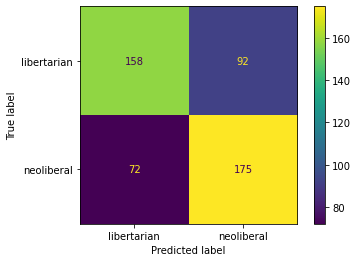

In [28]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['libertarian', 'neoliberal'])

In [29]:
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)]
#     'cvec__min_df': [1, 3, 5],
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6579313595654419


In [30]:
gs.best_params_

{'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english'}

In [31]:
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1, 3, 5],
    'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6572647078628987


In [32]:
gs.best_params_

{'cvec__max_df': 0.6,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [33]:
params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None, 1500, 2_000, 2500, 3_000]
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6572647078628987


In [34]:
gs.best_params_

{'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [35]:
params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6612937981190097


In [36]:
gs.best_params_

{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

IDEAL PARAMS FOR SURFACE LEVEL ANALYSIS

In [37]:
## IDEAL PARAMS SO FAR
X = df_initial['title']
y = df_initial['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6612937981190097


In [38]:
cross_val_score(gs, X_test, y_test).mean()

0.668060606060606

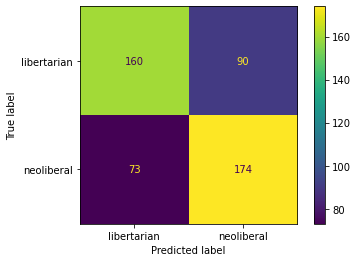

In [39]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['libertarian', 'neoliberal'])

Continued Analysis

In [40]:
from sklearn.preprocessing import FunctionTransformer

def number_to_text(X):
    return X.str.replace('\b\d+\b', ' HAS_NUMBER ')

number_to_text_tf = FunctionTransformer(number_to_text, validate=False)

In [41]:
pipe = Pipeline([
     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

In [42]:
params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to Fal

0.6612937981190097


In [43]:
# NO EFFECT WITH NUMBER TO TEXT CONVERSION IT SEEMS
gs.best_params_

{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [44]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [45]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
tokenizer = CountVectorizer().build_tokenizer()


def lem_tokenizer(string):
    tokens = tokenizer(string.lower())
    tokens_lem = [lemmatizer.lemmatize(token) for token in tokens] 
    return tokens_lem
def porter_tokenizer(string):
    tokens = tokenizer(string.lower())
    tokens_porter = [porter.stem(token) for token in tokens]

In [46]:
pipe = Pipeline([
     #('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

In [47]:
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    'cvec__tokenizer': [None, lem_tokenizer, porter_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

0.6612937981190097


/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': None}

In [48]:
params = {
    'cvec__stop_words': [None],
    'cvec__ngram_range': [(1,2)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    'cvec__tokenizer': [None],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.6404839397544386


Text(0.5, 1.0, 'Logistic Regression (Title)')

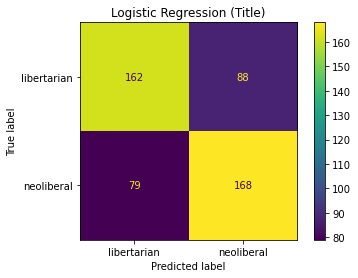

In [49]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['libertarian', 'neoliberal'])
plt.title('Logistic Regression (Title)')

In [50]:
# TOKENIZER APPEARS TO BE BEST SERVED AS NONE

selftext analysis

In [51]:
df_initial['selftext'].isna().sum()

1530

In [52]:
neolib['selftext'].isna().sum()

789

In [53]:
libertarian['selftext'].isna().sum()

741

In [54]:
df_initial[['selftext', 'subreddit']]

,selftext,subreddit
0,NaN,1
1,NaN,1
2,Don't know weather to put this down as Discuss...,1
3,NaN,1
4,NaN,1
...,...,...
1983,NaN,0
1984,NaN,0
1985,I know a lot of you republicans are in here be...,0
1986,[removed],0


In [55]:
df_no_null = df_initial[['selftext', 'subreddit']]

In [56]:
df_no_null['subreddit'].isna().sum()

0

In [57]:
df_no_null.dropna(inplace=True)

<ipython-input-57-2b16431f2796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null.dropna(inplace=True)


In [58]:
df_no_null.isna().sum()

selftext     0
subreddit    0
dtype: int64

In [59]:
df_no_null

,selftext,subreddit
2,Don't know weather to put this down as Discuss...,1
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1
17,Not me because we’re not a cult.,1
20,Boom!\n\nJoe Biden directly broke through the...,1
...,...,...
1980,Biden admin is so worried about gun controllin...,0
1981,Biden just fucked all of Afghanistan. \n\n3500...,0
1982,Trump is the main figurehead of the Republican...,0
1985,I know a lot of you republicans are in here be...,0


In [60]:
X = df_no_null['selftext']
y = df_no_null['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [61]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english']
    #     'cvec__ngram_range': [(1,1), (1,2)],
#     'cvec__min_df': [1, 3, 5],
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.746462063086104


In [62]:
gs.best_params_

{'cvec__stop_words': 'english'}

In [63]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1), (2,2), (3,3)]
#     'cvec__min_df': [1, 3, 5],
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.746462063086104


{'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}

In [64]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1)],
     'cvec__min_df': [1, 3, 5]
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.746462063086104


{'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}

In [65]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1)],
     'cvec__min_df': [1],
    'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7552855924978686


{'cvec__max_df': 0.6,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [66]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1)],
     'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None, 1500, 2_000, 2500, 3_000]
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7552855924978686


{'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [67]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1)],
     'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7552855924978686


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [68]:
# BEST INITIAL LOGREG PARAMS
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

params = {
    'cvec__stop_words': [None,'english'],
        'cvec__ngram_range': [(1,1)],
     'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7552855924978686


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

CONTINUED ANALYSIS

In [69]:
pipe = Pipeline([
     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,1)],
    'cvec__min_df': [1],
    'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)

<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to Fal

0.7552855924978686


<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')


In [70]:
# NO EFFECT WITH NUMBER TO TEXT CONVERSION IT SEEMS
gs.best_params_

{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [71]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
tokenizer = CountVectorizer().build_tokenizer()


def lem_tokenizer(string):
    tokens = tokenizer(string.lower())
    tokens_lem = [lemmatizer.lemmatize(token) for token in tokens] 
    return tokens_lem
def porter_tokenizer(string):
    tokens = tokenizer(string.lower())
    tokens_porter = [porter.stem(token) for token in tokens]

In [72]:
pipe = Pipeline([
     #('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

In [73]:
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1)],
    'cvec__min_df': [1, 3, 5],
    'cvec__max_df': [.6, .65, .7, .75],
    'cvec__tokenizer': [None, lem_tokenizer, porter_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [False, True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_


# TOKENIZER APPEARS TO BE BEST SERVED AS LEMATIZER, THERE ARE SOME SMALL ERRORS WITH USING THE TOKENIZERS BUT I DONT PERCEIVE THOSE AS BEING MAJOR ISSUES 

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

0.7639386189258313


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': <function __main__.lem_tokenizer(string)>}

In [74]:
#IDEAL PARAMS SELFTEXT
X = df_no_null['selftext']
y = df_no_null['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

pipe = Pipeline([
     #('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter = 1000))
])

params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,1)],
    'cvec__min_df': [5],
    'cvec__max_df': [.6],
    'cvec__tokenizer': [lem_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [False]
}
gs = GridSearchCV(pipe, param_grid=params);
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

0.7639386189258313


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': <function __main__.lem_tokenizer(string)>}

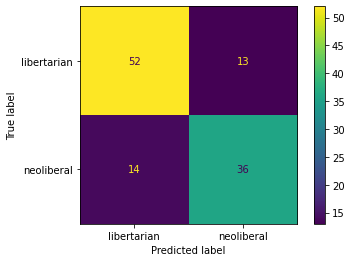

In [75]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['libertarian', 'neoliberal'])

In [76]:
pipe = Pipeline([
     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1)],
    'cvec__min_df': [5],
    'cvec__max_df': [.6],
    'cvec__tokenizer': [None, lem_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_
# NUMBER TO TEXT DOES NOTHING

<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to Fal

<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
<ipython-input-40-287262298fbc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return X.str.replace('\b\d+\b', ' HAS_NUMBER ')
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


0.7639386189258313


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': <function __main__.lem_tokenizer(string)>}

Before moving onto decision trees and KNN, must fully explore what I can do with logarithmic regression.

In [77]:
df_conversion = df_initial[['title', 'selftext', 'subreddit']]

In [78]:
df_conversion

,title,selftext,subreddit
0,Biden Must Purge Military and Law Enforcement ...,NaN,1
1,"Under Biden, it’s time for Democrats to let go...",NaN,1
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1
3,Joe Biden at noon today,NaN,1
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1
...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,0
1984,Biden administration to require a COVID-19 boo...,NaN,0
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0


In [79]:
df_conversion['selftext'].fillna(' ', inplace=True)

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [80]:
df_conversion['selftext'].isna().sum()

0

In [81]:
df_conversion['totaltext'] = (df_conversion['title'] + df_conversion['selftext'])

In [82]:
df_conversion

,title,selftext,subreddit,totaltext
0,Biden Must Purge Military and Law Enforcement ...,,1,Biden Must Purge Military and Law Enforcement ...
1,"Under Biden, it’s time for Democrats to let go...",,1,"Under Biden, it’s time for Democrats to let go..."
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,"Yeah, I am officially Neoliberal now.Don't kno..."
3,Joe Biden at noon today,,1,Joe Biden at noon today
4,Canada's ambassador to U.S. shares most Biden ...,,1,Canada's ambassador to U.S. shares most Biden ...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,,0,Biden admin expected to recommend covid booste...
1984,Biden administration to require a COVID-19 boo...,,0,Biden administration to require a COVID-19 boo...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0,So the “America First” party is mad that Biden...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0,"Joe Biden pulled out of Aghanistan, what now?[..."


In [83]:
X = df_conversion['totaltext']
y = df_conversion['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [84]:
pipe = Pipeline([
#     ('number_to_text_tf', number_to_text_tf),
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression(max_iter = 1000))
])

params = {
    'cvec__stop_words': [None,'english']
    #     'cvec__ngram_range': [(1,1), (1,2)],
   # 'cvec__min_df': [1]
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6639828511144531


{'cvec__stop_words': 'english'}

In [85]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1), (1,2), (2,2), (3,3)]
   # 'cvec__min_df': [1]
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6639828511144531


{'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}

In [86]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1), (1,2), (2,2), (3,3)],
   'cvec__min_df': [1, 3, 5]
#     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6639828511144531


{'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}

In [87]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1)],
   'cvec__min_df': [1],
     'cvec__max_df': [.6, .65, .7, .75,]
    #'cvec__tokenizer': [None, custom_tokenizer],
    #'cvec__max_features': [None, 1500, 2_000, 2500, 3_000],
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6606293910349936


{'cvec__max_df': 0.6,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [88]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1)],
   'cvec__min_df': [1],
     'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer]
    'cvec__max_features': [None, 1500, 2_000, 2500, 3_000]
    #'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6606293910349936


{'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [89]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1)],
   'cvec__min_df': [1],
     'cvec__max_df': [.6],
    #'cvec__tokenizer': [None, custom_tokenizer]
    'cvec__max_features': [None],
    'cvec__binary': [True, False]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6666629256357882


{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [90]:
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1)],
   'cvec__min_df': [1],
     'cvec__max_df': [.6],
    'cvec__tokenizer': [None, lem_tokenizer, porter_tokenizer],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/adamklesc11/opt/anaconda3/lib/

0.6666629256357882


{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': None}

In [91]:
# IDEAL PARAMS TOTALTEXT
params = {
    'cvec__stop_words': ['english'],
        'cvec__ngram_range': [(1,1)],
   'cvec__min_df': [1],
     'cvec__max_df': [.6],
    'cvec__tokenizer': [None],
    'cvec__max_features': [None],
    'cvec__binary': [True]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6666629256357882


{'cvec__binary': True,
 'cvec__max_df': 0.6,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__tokenizer': None}

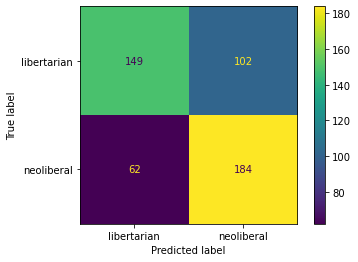

In [92]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['libertarian', 'neoliberal'])

USING NEWLY CLEANED DATA

In [113]:
token_self = pd.read_csv('../data/tokenself.csv')
token_title = pd.read_csv('../data/tokentitle.csv')
token_total = pd.read_csv('../data/tokentotal.csv')

In [114]:
token_title.drop('Unnamed: 0', axis = 1, inplace= True)
token_self.drop('Unnamed: 0', axis = 1, inplace = True)
token_total.drop('Unnamed: 0', axis = 1, inplace = True)

In [115]:
token_title

,00,000,01,10,100,1000s,100k,100th,102,10k,...,zelenskyy,zero,zone,zones,zoning,neg,neu,pos,compound,lib_or_neolib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.645,0.355,0.2960,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.177,0.695,0.127,-0.2177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.737,0.263,0.3612,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.189,0.651,0.160,-0.1280,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0


In [139]:
logreg = LogisticRegression()
X = token_title.drop('lib_or_neolib', axis = 1)
y = token_title['lib_or_neolib']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

logreg.fit(X_train, y_train)

LogisticRegression()

In [117]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9738430583501007, 0.6659959758551308)

In [118]:
cross_val_score(logreg, X_train, y_train).mean(), cross_val_score(logreg, X_test, y_test).mean()

(0.6532603084105856, 0.6398383838383838)

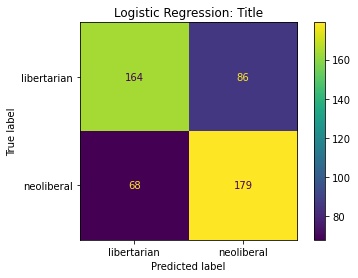

In [130]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['libertarian', 'neoliberal'])
plt.title('Logistic Regression: Title')
plt.savefig('./graphs/conf_matrix_title', bbox_inches='tight')

In [131]:
logreg = LogisticRegression()
X = token_total.drop('lib_or_neolib', axis = 1)
y = token_total['lib_or_neolib']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

logreg.fit(X_train, y_train)

LogisticRegression()

In [132]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9818913480885312, 0.6901408450704225)

In [133]:
cross_val_score(logreg, X_train, y_train).mean(), cross_val_score(logreg, X_test, y_test).mean()

(0.6794235819622456, 0.6398787878787879)

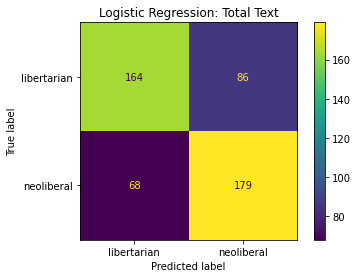

In [134]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['libertarian', 'neoliberal'])
plt.title('Logistic Regression: Total Text')
plt.savefig('./graphs/conf_matrix_total', bbox_inches='tight')

In [135]:
logreg = LogisticRegression()
X = token_self.drop('lib_or_neolib', axis = 1)
y = token_self['lib_or_neolib']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

logreg.fit(X_train, y_train)

LogisticRegression()

In [136]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9795918367346939, 0.782608695652174)

In [137]:
cross_val_score(logreg, X_train, y_train).mean(), cross_val_score(logreg, X_test, y_test).mean()

(0.7347399829497017, 0.7043478260869565)

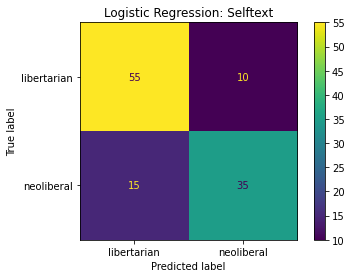

In [138]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['libertarian', 'neoliberal'])
plt.title('Logistic Regression: Selftext')
plt.savefig('./graphs/conf_matrix_selftext', bbox_inches='tight')